In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,train_test_split,cross_val_predict,cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("NewMachine.csv")
data.head()

,OpeningTime,Open,High,Low,Close,Volume,CloseTime,RSI,MACD,MACDSIGNAL,MACDHIST,STOCHK,STOCHD,PredictValue
0,1578739500000,8054.34,8083.42,8054.34,8080.11,141.913060,1578739799999,50.52,1.02,8.64,-7.63,31.91,24.17,8050.37
1,1578739800000,8081.09,8081.30,8050.37,8050.37,128.045741,1578740099999,42.11,-1.64,6.59,-8.23,27.88,24.98,8054.03
2,1578740100000,8050.27,8059.39,8042.89,8054.03,193.106203,1578740399999,43.36,-3.41,4.59,-8.00,35.03,31.61,8027.63
3,1578740400000,8054.03,8054.03,8020.00,8027.63,290.159767,1578740699999,37.13,-6.87,2.30,-9.16,13.17,25.36,8026.66
4,1578740700000,8029.22,8036.72,8010.00,8026.66,243.755800,1578740999999,36.92,-9.57,-0.08,-9.50,20.74,22.98,8037.00


In [3]:
del data['OpeningTime']
del data['CloseTime']
data.head()

,Open,High,Low,Close,Volume,RSI,MACD,MACDSIGNAL,MACDHIST,STOCHK,STOCHD,PredictValue
0,8054.34,8083.42,8054.34,8080.11,141.913060,50.52,1.02,8.64,-7.63,31.91,24.17,8050.37
1,8081.09,8081.30,8050.37,8050.37,128.045741,42.11,-1.64,6.59,-8.23,27.88,24.98,8054.03
2,8050.27,8059.39,8042.89,8054.03,193.106203,43.36,-3.41,4.59,-8.00,35.03,31.61,8027.63
3,8054.03,8054.03,8020.00,8027.63,290.159767,37.13,-6.87,2.30,-9.16,13.17,25.36,8026.66
4,8029.22,8036.72,8010.00,8026.66,243.755800,36.92,-9.57,-0.08,-9.50,20.74,22.98,8037.00


In [4]:
y = data['PredictValue']
del data['PredictValue']
X_train, X_test, y_train, y_test = data[:190000], data[190000:],y[:190000], y[190000:]
data.head()

,Open,High,Low,Close,Volume,RSI,MACD,MACDSIGNAL,MACDHIST,STOCHK,STOCHD
0,8054.34,8083.42,8054.34,8080.11,141.913060,50.52,1.02,8.64,-7.63,31.91,24.17
1,8081.09,8081.30,8050.37,8050.37,128.045741,42.11,-1.64,6.59,-8.23,27.88,24.98
2,8050.27,8059.39,8042.89,8054.03,193.106203,43.36,-3.41,4.59,-8.00,35.03,31.61
3,8054.03,8054.03,8020.00,8027.63,290.159767,37.13,-6.87,2.30,-9.16,13.17,25.36
4,8029.22,8036.72,8010.00,8026.66,243.755800,36.92,-9.57,-0.08,-9.50,20.74,22.98


In [6]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train,y_train)

RandomForestRegressor()

In [28]:
from sklearn.metrics import accuracy_score,mean_squared_error, r2_score
y_pred_test = rand_forest.predict(X_test)
mean_squared_error(y_test, y_pred_test),r2_score(y_test,y_pred_test),rand_forest.score(X_train, y_train)

(37064.74452362521, 0.9992601365929616, 0.9999962034742689)

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
    'n_estimators': [3,10,30,40,50,60,80,100], 'max_features':[2,4,6,8,10,11]},
    {'bootstrap':[False], 'n_estimators':[3,5,10],'max_features':[2,3,4,6,8,10,11]},
]
rf_reg = RandomForestRegressor()
grid_search = GridSearchCV(rf_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True )
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 11],
                          'n_estimators': [3, 10, 30, 40, 50, 60, 80, 100]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 6, 8, 10, 11],
                          'n_estimators': [3, 5, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 3}

In [33]:
grid_search.best_score_

-2816927.6285376856

In [34]:
grid_search.best_index_

57

In [36]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']): 
    print(np.sqrt(-mean_score), params)

1794.2663855686044 {'max_features': 2, 'n_estimators': 3}
1762.518100055302 {'max_features': 2, 'n_estimators': 10}
1770.6858390479283 {'max_features': 2, 'n_estimators': 30}
1768.9052716877995 {'max_features': 2, 'n_estimators': 40}
1769.2439095449463 {'max_features': 2, 'n_estimators': 50}
1768.6231301304797 {'max_features': 2, 'n_estimators': 60}
1763.8425909119987 {'max_features': 2, 'n_estimators': 80}
1765.0320425356283 {'max_features': 2, 'n_estimators': 100}
1727.2171932067893 {'max_features': 4, 'n_estimators': 3}
1720.2483514509277 {'max_features': 4, 'n_estimators': 10}
1708.981607680713 {'max_features': 4, 'n_estimators': 30}
1718.3342447222992 {'max_features': 4, 'n_estimators': 40}
1714.4566393846735 {'max_features': 4, 'n_estimators': 50}
1712.7938905834312 {'max_features': 4, 'n_estimators': 60}
1713.1490637629165 {'max_features': 4, 'n_estimators': 80}
1716.889216424224 {'max_features': 4, 'n_estimators': 100}
1704.8531860908554 {'max_features': 6, 'n_estimators': 3}
1

In [39]:
y_test_pred = grid_search.predict(X_test)
r2_score(y_test,y_test_pred)

0.9991126952469338

In [42]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
                 'max_features': max_features,
                 'max_depth': max_depth,
                 'min_samples_split': min_samples_split,
                 'min_samples_leaf': min_samples_leaf}
forest_reg = RandomForestRegressor()

In [44]:
random_Search = RandomizedSearchCV(forest_reg, random_grid, cv = 5,n_iter =10,verbose=0, random_state=100 , n_jobs = -1)
random_Search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 20, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100]},
                   random_state=100)

In [45]:
random_Search.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [46]:
random_Search.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10)

In [47]:
random_Search.best_score_

0.7800766609683286

In [48]:
newRandomForest = RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10)
newRandomForest.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, min_samples_leaf=2, min_samples_split=10)

In [64]:
y_test_pred = newRandomForest.predict(X_train)

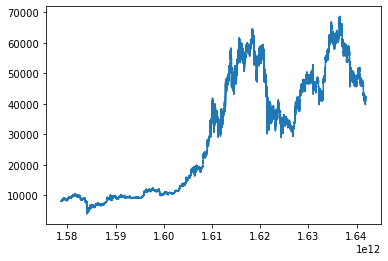

In [65]:
data2 = pd.read_csv("NewMachine.csv")
plt.plot(data2['CloseTime'],data2['Close'])

In [67]:
data2 = data2[:190000]

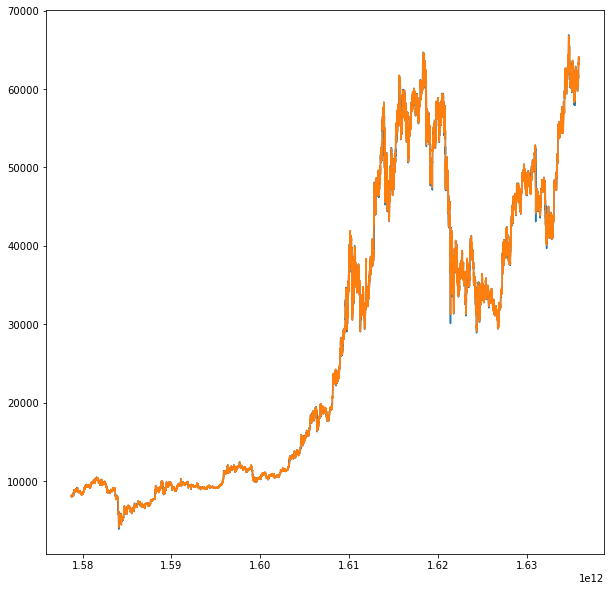

In [70]:
plt.figure(figsize=(10,10))
plt.plot(data2['CloseTime'],data2['Close'])
plt.plot(data2['CloseTime'],y_test_pred)
plt.savefig("MachineAndPred")

In [74]:
from sklearn.metrics import accuracy_score
pred_y_regularRf = rand_forest.predict(X_test)
pred_y_gridRf = grid_search.predict(X_test)
pred_y_randomrRf = random_Search.predict(X_test)
pred_y_afterRandomRf = newRandomForest.predict(X_test)

def WriteScores(): 
    print("Model : Regular RF Score : ",rand_forest.score(X_train, y_train))
    print("Model : Grid Search RF Score : ",grid_search.score(X_train, y_train))
    print("Model : Randomized Search RF Score : ",random_Search.score(X_train, y_train))
    print("Model : After Randomized Search RF Score : ",newRandomForest.score(X_train, y_train))
    print("------------------- ")
    print("Model : Regular RF MSE Score : ",mean_squared_error(pred_y_regularRf,y_test))
    print("Model : Grid Search RF MSE Score : ",mean_squared_error(pred_y_gridRf,y_test))
    print("Model : Randomized Search RF MSE Score : ",mean_squared_error(pred_y_randomrRf,y_test))
    print("Model : After Randomized Search RF MSE Score : ",mean_squared_error(pred_y_afterRandomRf,y_test))
    print("------------------- ")
    print("Model : Regular RF RMSE Score : ",np.sqrt(mean_squared_error(pred_y_regularRf,y_test)))
    print("Model : Grid Search RF RMSE Score : ",np.sqrt(mean_squared_error(pred_y_gridRf,y_test)))
    print("Model : Randomized Search RF RMSE Score : ",np.sqrt(mean_squared_error(pred_y_randomrRf,y_test)))
    print("Model : After Randomized Search RF RMSE Score : ",np.sqrt(mean_squared_error(pred_y_afterRandomRf,y_test)))
    print("------------------- ")
    print("Model : Regular RF R2 Score : ",r2_score(pred_y_regularRf,y_test))
    print("Model : Grid Search RF R2 Score : ",r2_score(pred_y_gridRf,y_test))
    print("Model : Randomized Search RF R2 Score : ",r2_score(pred_y_randomrRf,y_test))
    print("Model : After Randomized Search RF R2 Score : ",r2_score(pred_y_afterRandomRf,y_test))
WriteScores()

Model : Regular RF Score :  0.9999962034742689
Model : Grid Search RF Score :  -3.2882606140068516e-24
Model : Randomized Search RF Score :  0.9999901411514448
Model : After Randomized Search RF Score :  0.9999901103124362
------------------- 
Model : Regular RF MSE Score :  37064.74452362521
Model : Grid Search RF MSE Score :  44451.075258126024
Model : Randomized Search RF MSE Score :  36087.81712975222
Model : After Randomized Search RF MSE Score :  36512.52657933012
------------------- 
Model : Regular RF RMSE Score :  192.52206243343957
Model : Grid Search RF RMSE Score :  210.83423644684945
Model : Randomized Search RF RMSE Score :  189.96793710979813
Model : After Randomized Search RF RMSE Score :  191.08251248957902
------------------- 
Model : Regular RF R2 Score :  0.9992522386208773
Model : Grid Search RF R2 Score :  0.9991038266399299
Model : Randomized Search RF R2 Score :  0.9992720812606795
Model : After Randomized Search RF R2 Score :  0.9992636189027816


In [78]:
col_names = ["Open","High","Low","Close","Volume","RSI","MACD","MACDSIGNAL","MACDHIST","STOCHK","STOCHD"]
datas = [[44734.06,44747.94,44724.68,44736.59,54.46984,60.72,13.19,8.68,4.51,81.52,61.42]]
tryData = pd.DataFrame(datas, columns = col_names)
regularRf = rand_forest.predict(tryData)
gridRf = grid_search.predict(tryData)
randomRf = random_Search.predict(tryData)
newRfTry = newRandomForest.predict(tryData)
print("Expected Result : 44743")
print(regularRf,gridRf, randomRf, newRfTry)

Expected Result : 44743
[44782.5966] [45113.07] [44748.85858187] [44735.09039088]
